- Data/Analysis coverage: 2010-20181205
- Countries: SEA_COUNTRY_CODE = ['IDN', 'VNM', 'THA', 'PHL', 'SGP', 'MYS', 'MMR', 'LAO']. NO TAIWAN, JAPAN and KOREA since those coutries are not SEA
- only acquisitions or buyouts. no IPO included here.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

# === set figure styles ===
sns.set_context('notebook')
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="whitegrid")

# set display options for dataframe output
pd.set_option('display.max_columns', 200)

# plt.style.use('default')

Style set references  
- [palette link](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)

In [2]:
def set_fig_titles(fig,title,xlabel,ylabel):
    fig.set_title(title)
    fig.set_xlabel(xlabel)
    fig.set_ylabel(ylabel)
    
    plt.tight_layout()
    plt.savefig('./figures_acq/%s.png'%title, dpi=300)

    
def annotate_v(fig):
    for p in fig.patches: 
        fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), fontsize=10, ha='center', alpha=0.7)

def annotate_h(fig):
    for p in fig.patches: 
        fig.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+0.2, p.get_y()+0.3), fontsize=10, ha='left', alpha=0.7)

In [3]:
raw_acq = pd.read_csv('./data/sea_aquisitions_2010_20181216.csv')
raw_acq.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16


### 1. Data preprocessing

In [4]:
raw_acq.acquired_on.dtype

dtype('O')

Change 'acquired_on' to datetime type

In [5]:
raw_acq['acquired_on'] = pd.to_datetime(raw_acq['acquired_on'])
raw_acq.acquired_on.dtype

dtype('<M8[ns]')

Change datetime YYMMDD to YYMM  & YY

In [6]:
raw_acq['acquired_on_YY'] = pd.DatetimeIndex(raw_acq['acquired_on']).year
raw_acq['acquired_on_YYMM'] = raw_acq['acquired_on'].dt.to_period('M')

raw_acq.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16,2018,2018-12


## 2. Basic analysis / Data integrity

**- Total number of acquisition from 2010-2018 YTD (15th DEC): 676**

In [7]:
len(raw_acq)

676

## 3. Acquisitions analysis (1/2) - incl. the companies who didn't get funded before the acquisition
## 3.1 Acquisition Time, Region

- acquitions by time: 

In [8]:
# count by time
grp_time = raw_acq.groupby(['acquired_on_YY']).size().reset_index(name='count')

if True:
    """alternative method"""
    print ("\n ")
    print ("by value_counts(): \n")
    print(raw_acq['acquired_on_YY'].value_counts().sort_index(ascending = True))  
    
    
grp_time


 
by value_counts(): 

2010     32
2011     38
2012     38
2013     48
2014     58
2015     65
2016    126
2017    153
2018    118
Name: acquired_on_YY, dtype: int64


,acquired_on_YY,count
0,2010,32
1,2011,38
2,2012,38
3,2013,48
4,2014,58
5,2015,65
6,2016,126
7,2017,153
8,2018,118


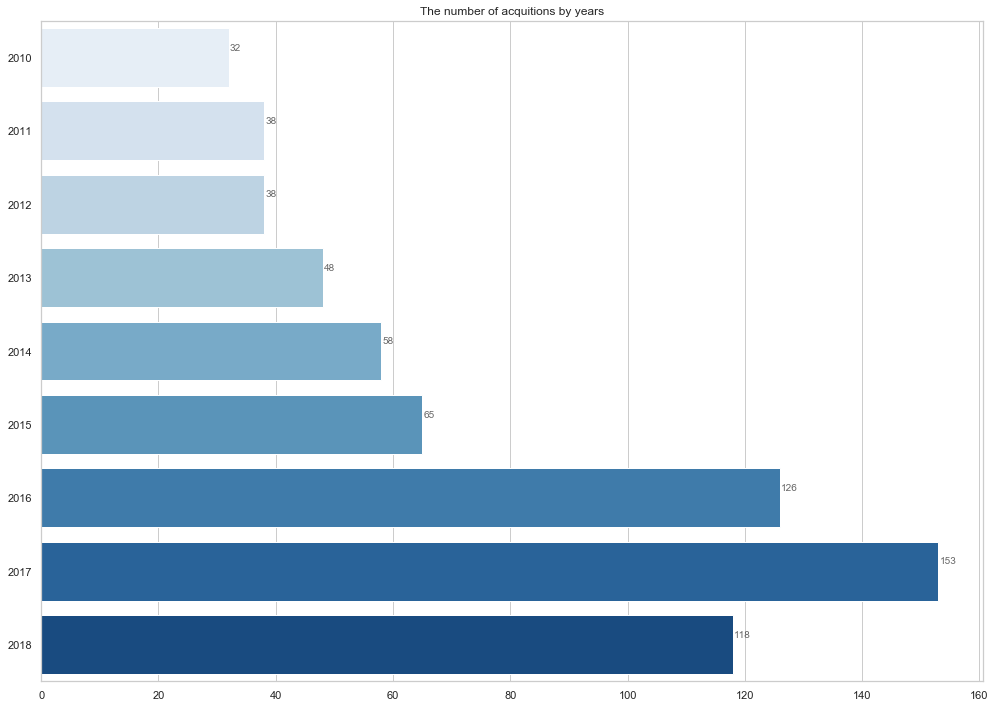

In [9]:
g1 = plt.figure(figsize = (14,10))
g1 = sns.barplot(x = 'count', y = 'acquired_on_YY', data = grp_time,
                orient = 'h', palette = 'Blues')

# annotations
annotate_h(g1)

# figure titles
set_fig_titles(g1,"The number of acquitions by years","","")

* acquisition by nation by time (acquiree):

In [10]:
grp_region = raw_acq.groupby(['acquiree_country_code']).size().reset_index(name='count')
grp_region = grp_region.sort_values(by='count', ascending = False)
grp_region.reset_index(drop=True)

,acquiree_country_code,count
0,SGP,316
1,MYS,102
2,IDN,88
3,PHL,71
4,THA,51
5,VNM,37
6,MMR,10
7,LAO,1


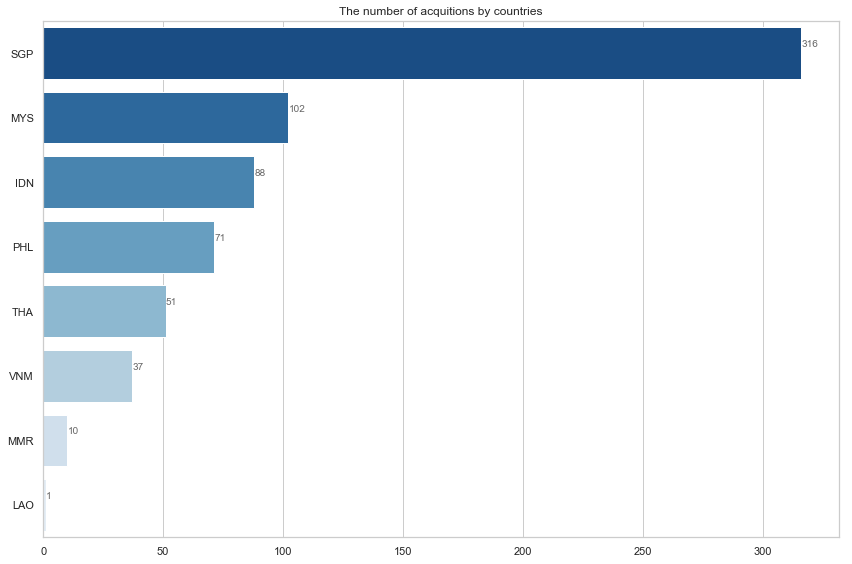

In [11]:
g2 = plt.figure()
g2 = sns.barplot(x = 'count', y = 'acquiree_country_code', data = grp_region,
                orient = 'h', palette = 'Blues_r')

# annotations
annotate_h(g2)

# figure titles
set_fig_titles(g2,"The number of acquitions by countries","","")

- acquisition by nation by time (acquiree): 

In [12]:
grp_region_time = raw_acq.groupby(['acquired_on_YY','acquiree_country_code']).size().reset_index(name='count')
grp_region_time

,acquired_on_YY,acquiree_country_code,count
0,2010,IDN,4
1,2010,MYS,6
2,2010,PHL,3
3,2010,SGP,18
4,2010,THA,1
5,2011,IDN,4
6,2011,MYS,5
7,2011,PHL,5
8,2011,SGP,18
9,2011,THA,3


- acquisition by nation by time (acquirer):

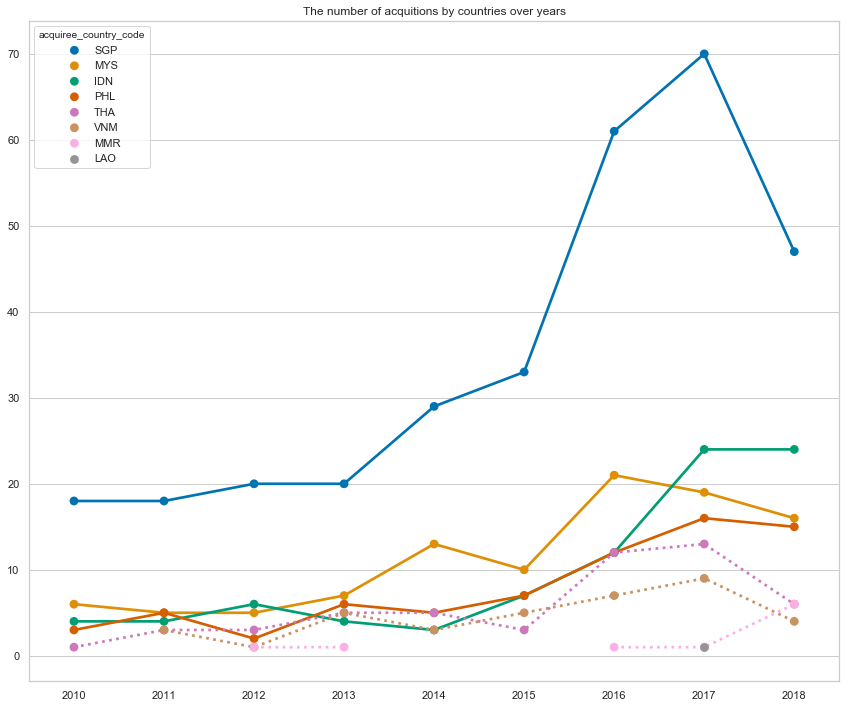

In [13]:
g3= plt.figure(figsize=(12,10))
g3 = sns.pointplot(x= 'acquired_on_YY',y='count', hue='acquiree_country_code', data = grp_region_time,
                   hue_order = ['SGP','MYS','IDN','PHL','THA','VNM','MMR','LAO'],
                     markers='o', linestyles=['-','-','-','-',':',':',':',':'],
                   palette='colorblind' 
#                    palette='husl' 
                  )

# figure titles
set_fig_titles(g3,"The number of acquitions by countries over years","","")

## 3.2 Acquirers - countries, companies

## 3.2.0 Data preparation: Join two different tables 

In [14]:
raw_org = pd.read_csv('./data/sea_organizations-20181216.csv')
raw_org.head(1)

,company_name,roles,permalink,domain,homepage_url,country_code,state_code,region,city,address,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,closed_on,employee_count,aliases,uuid,created_at,updated_at,primary_role,type
0,Apindo Karya Lestari,company,/organization/apindo-karya-lestari,apindokl.co.id,https://www.apindokl.co.id/,IDN,NaN,Tangerang,Tangerang,"Komp. Ruko Serpong 1 Cilenggang, No.17-A",operating,Jasa epoxy lantai jakarta,Industrial Manufacturing,Manufacturing,1,NaN,1987-02-02,1987-02-02,NaN,11-50,NaN,7811358c-0393-4190-b9f4-9dfe5cdce7d1,2018-04-27 12:09:11,2018-08-09 07:13:00,company,organization


In [15]:
COL_org = ['country_code','status','short_description',
           'category_list','category_group_list','funding_rounds',
           'funding_total_usd','founded_on','last_funding_on',
           'employee_count','uuid']

raw_org = raw_org[COL_org] # select the columns only matter
# raw_org.drop( xxx,axis=1,inplace=True) # alternative way: drop columns

raw_org.head(1)

,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,uuid
0,IDN,operating,Jasa epoxy lantai jakarta,Industrial Manufacturing,Manufacturing,1,NaN,1987-02-02,1987-02-02,11-50,7811358c-0393-4190-b9f4-9dfe5cdce7d1


**Check out if uuids of acquiree companies are all available in organization table :**

In [16]:
raw_acq['acquiree_uuid'].isin(raw_org['uuid']).value_counts()

True    676
Name: acquiree_uuid, dtype: int64

All data about acquiree companies are availale in organization table. That is, all of the acquiree comapnies will be mapped.  
As a second step, two tables will be merged using `uuid` key. 
- references:  https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/ , 
https://www.tutorialspoint.com/python_pandas/python_pandas_merging_joining.htm

In [17]:
# create acquiree_uuid column for raw_org to join tables 

# Method 1 : create a new column
# raw_org['acquiree_uuid'] = raw_org['uuid']

# Method 2 : rename the column
raw_org = raw_org.rename(columns={'uuid': 'acquiree_uuid'})
raw_org.head(1)

,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,acquiree_uuid
0,IDN,operating,Jasa epoxy lantai jakarta,Industrial Manufacturing,Manufacturing,1,NaN,1987-02-02,1987-02-02,11-50,7811358c-0393-4190-b9f4-9dfe5cdce7d1


**left join/merge ** the dataframes: 

In [18]:
# left join 
# left dataframe: raw_acq, dataframe to merge: raw_org

merged_acq = pd.merge(raw_acq,
                 raw_org,
                 on='acquiree_uuid', 
                 how='left')

merged_acq.to_csv('./exports/merged_acq_org_20181205.csv', encoding='utf-8', index=False)

In [19]:
merged_acq.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16,2018,2018-12,IDN,acquired,Prinzio is a commercial printing outsourcing,"Outsourcing,Printing","Content and Publishing,Media and Entertainment...",1,400000.0,2015-01-01,2015-11-17,1-10


Change founded_on, and last_funding_on to datetime object

In [20]:
merged_acq['founded_on'] = pd.to_datetime(merged_acq['founded_on'])
merged_acq['last_funding_on'] = pd.to_datetime(merged_acq['last_funding_on'])
# merged_acq['acquired_on_YYMM'] = pd.to_datetime(merged_acq['acquired_on_YYMM'])

merged_acq['founded_on'].dtype

dtype('<M8[ns]')

## 3.2.1 Acquirer countries

In [21]:
grp_aquirer_country = merged_acq.groupby(['acquirer_country_code']).size().reset_index(name='count')
grp_aquirer_country = grp_aquirer_country.sort_values(by='count',ascending=False)
grp_aquirer_country.reset_index(drop=True)

,acquirer_country_code,count
0,SGP,125
1,USA,113
2,GBR,64
3,MYS,52
4,PHL,34
5,JPN,30
6,FRA,30
7,IDN,29
8,AUS,28
9,THA,20


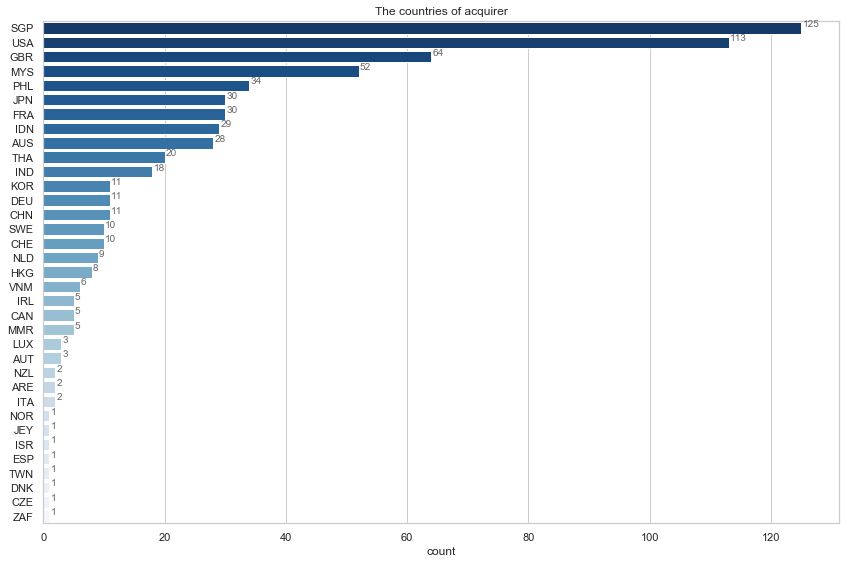

In [22]:
g4 = plt.figure()
g4 = sns.barplot(x = 'count', y = 'acquirer_country_code', data = grp_aquirer_country,
                orient = 'h', palette = 'Blues_r')

# annotations
annotate_h(g4)

# figure titles
set_fig_titles(g4,"The countries of acquirer","count","")

## 3.2.2 Acquirer Companies

In [23]:
temp_list = merged_acq['acquirer_name'].unique()

print ("- unique acquirers: %s companies \n %s " % (len(temp_list),temp_list))

grp_aquirer_name = merged_acq.groupby(['acquirer_name']).size().reset_index(name='count')
grp_aquirer_name.sort_values(by='count',ascending=False).reset_index(drop=True)

- unique acquirers: 558 companies 
 ['Gogoprint Pte Ltd' 'Trescal' 'Sabio' 'United Overseas Bank' 'CPH Ltd.'
 'TEG Pty Ltd' 'Golin' 'EY' 'The Intermedia Group Pty Ltd'
 'LightInTheBox.com' 'SESAMi' 'Rajah & Tann' 'Memories Group'
 'Tanachira Group' 'Lotte Confectionery' 'Sleekr' 'TNG FinTech Group'
 'Aurionpro' 'Bukalapak' 'Surbana Jurong Private Limited' 'TNG Wallet'
 'De Heus Animal Nutrition' 'MaNaDr Mobile Health' 'Venuerific'
 'CapitaLand Limited' 'Ringier' 'Honeywell International'
 'Zurich Insurance Group' 'Everise' 'Go-Jek' 'Dusit International'
 'Greenergy' 'WhatsHalal Pte Ltd.' 'ChinaLink Professional Service'
 'BigDish' 'Rovo' 'Gaw Capital Partners' 'Thai Nippon Rubber Industry'
 'Collab Partnerships' 'Transcom WorldWide' 'Credit Card Compare'
 'Omesti Berhad' 'Bain Capital' 'M1' 'Sojitz'
 'KKR & Co. (Kohlberg Kravis Roberts & Co.)' 'MySQUAR' 'PTT'
 'Tokio Marine Holdings' 'Allied Technologies Ltd.' 'Geevv'
 'Advantage Partners' 'Myanmar Strategic Holdings'
 'Maybank Asset M

,acquirer_name,count
0,CVC Capital Partners,6
1,Go-Jek,6
2,Dentsu Aegis Network,5
3,Jones Lang LaSalle (JLL),4
4,Bureau Veritas,4
5,iFashion Group,4
6,Singapore Press Holdings,4
7,Securitas,3
8,GroupM,3
9,Thomson Medical Group,3


## 3.2.3 No.of funding rounds before acquisition

In [24]:
grp_funding_num = merged_acq.groupby(['funding_rounds'])

grp_funding_num.describe()

acquired_on_YY                                                 \
                        count         mean       std     min     25%     50%   
funding_rounds                                                                 
0                       585.0  2015.211966  2.407080  2010.0  2013.0  2016.0   
1                        59.0  2015.966102  1.865902  2010.0  2015.0  2016.0   
2                        14.0  2016.500000  1.160239  2014.0  2016.0  2016.5   
3                         9.0  2015.555556  1.589899  2014.0  2014.0  2015.0   
4                         5.0  2014.600000  3.781534  2010.0  2011.0  2017.0   
5                         2.0  2015.000000  1.414214  2014.0  2014.5  2015.0   
6                         1.0  2015.000000       NaN  2015.0  2015.0  2015.0   
7                         1.0  2016.000000       NaN  2016.0  2016.0  2016.0   

                               funding_total_usd                              \
                   75%     max             count          mean           std   
funding_rounds                                                                 
0               2017.0  2018.0               0.0           NaN           NaN   
1               2017.5  2018.0              36.0  2.032358e+07  7.998617e+07   
2               2017.0  2018.0              10.0  6.365724e+06  1.210199e+07   
3               2016.0  2018.0               9.0  8.207169e+06  1.204147e+07   
4               2017.0  2018.0               4.0  1.846569e+07  2.040933e+07   
5               2015.5  2016.0               2.0  1.269000e+08  1.228952e+08   
6               2015.0  2015.0               1.0  1.644000e+07           NaN   
7               2016.0  2016.0               1.0  5.510000e+07           NaN   

                                                                   \
                       min          25%          50%          75%   
funding_rounds                                                      
0                      NaN          NaN          NaN          NaN   
1                 105054.0    387500.00     677500.0    3175000.0   
2                  50000.0   1299058.25    2000000.0    3189252.5   
3                 392000.0    710392.00    3000000.0   10464859.0   
4                  50000.0   1972055.75   16106370.5   32600000.0   
5               40000000.0  83450000.00  126900000.0  170350000.0   
6               16440000.0  16440000.00   16440000.0   16440000.0   
7               55100000.0  55100000.00   55100000.0   55100000.0   

                            price                                        \
                        max count          mean           std       min   
funding_rounds                                                            
0                       NaN  48.0  2.138689e+09  1.092051e+10  510000.0   
1               470000000.0   0.0           NaN           NaN       NaN   
2                39900000.0   0.0           NaN           NaN       NaN   
3                37600000.0   0.0           NaN           NaN       NaN   
4                41600000.0   0.0           NaN           NaN       NaN   
5               213800000.0   0.0           NaN           NaN       NaN   
6                16440000.0   0.0           NaN           NaN       NaN   
7                55100000.0   0.0           NaN           NaN       NaN   

                                                                  price_usd  \
                       25%         50%          75%           max     count   
funding_rounds                                                                
0               10000000.0  61800000.0  338000000.0  7.410000e+10     135.0   
1                      NaN         NaN          NaN           NaN      10.0   
2                      NaN         NaN          NaN           NaN       6.0   
3                      NaN         NaN          NaN           NaN       1.0   
4                      NaN         NaN          NaN           NaN       2.0   
5                      NaN         

In [25]:
# resetting index.
# temp_df= pd.DataFrame(grp_funding_num.size()) # this doesn't make flattened dataframe
temp_df= pd.DataFrame(grp_funding_num.size()).reset_index()
temp_df.columns = ['no_of_rounds', 'count']
temp_df

,no_of_rounds,count
0,0,585
1,1,59
2,2,14
3,3,9
4,4,5
5,5,2
6,6,1
7,7,1


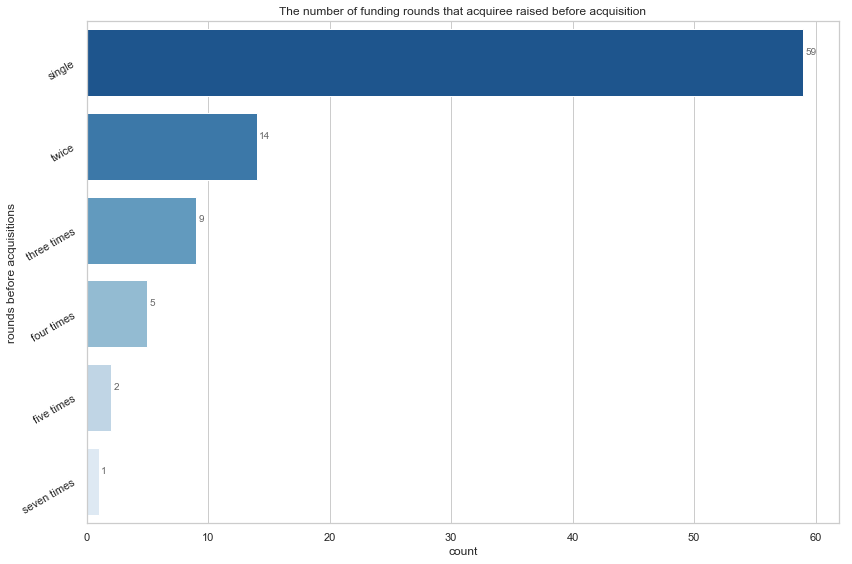

In [26]:
g5 = plt.figure()
g5 = sns.barplot(x = 'count', y = 'no_of_rounds', data = temp_df[1:7],
                orient = 'h', palette = 'Blues_r')

g5.set_yticklabels(["single","twice","three times","four times", "five times", "seven times"],rotation=30)

# annotations
annotate_h(g5)

# figure titles
set_fig_titles(g5,"The number of funding rounds that acquiree raised before acquisition","count","rounds before acquisitions")



## 3.3 Duration until acquired - year duration, funding stage before acquisition

In [27]:
merged_acq[['founded_on','acquired_on']].head(10)

,founded_on,acquired_on
0,2015-01-01,2018-12-13
1,1996-01-01,2018-12-06
2,NaT,2018-12-03
3,NaT,2018-11-27
4,NaT,2018-11-22
5,1995-01-01,2018-11-22
6,2008-01-01,2018-11-21
7,1996-01-01,2018-11-16
8,2004-01-01,2018-11-12
9,2010-01-01,2018-11-09


In [28]:
# tutorials : datetime operations
tmp_today = pd.to_datetime('today')

# pd.to_datetime('today') - pd.to_datetime('2018-10-04')

print (tmp_today - merged_acq['founded_on'].head(3))
print (merged_acq['acquired_on'].head(1) - merged_acq['founded_on'].head(1))

0   1445 days
1   8385 days
2         NaT
Name: founded_on, dtype: timedelta64[ns]
0   1442 days
dtype: timedelta64[ns]


In [29]:
merged_acq['Duration_to_exit'] = merged_acq['acquired_on'] - merged_acq['founded_on']
merged_acq['Duration_to_exit'].head(10)

0   1442 days
1   8375 days
2         NaT
3         NaT
4         NaT
5   8726 days
6   3977 days
7   8355 days
8   5429 days
9   3234 days
Name: Duration_to_exit, dtype: timedelta64[ns]

In [30]:
# temp
# merged_acq.to_csv('./exports/temp.csv', encoding='utf-8', index=False)

In [31]:
DELETE_COM = ['Asticom Technology','Barclays Wealth and Investment Management - Singapore and Hong Kong','Gibraltar BSN Life Berhad']

#  Due to wrong information in datetime, take out 3 companies
merged_acq[~merged_acq['acquiree_name'].isin(DELETE_COM)]
len(merged_acq[~merged_acq['acquiree_name'].isin(DELETE_COM)])

673

In [32]:
merged_acq = merged_acq[~merged_acq['acquiree_name'].isin(DELETE_COM)]

Based on [571] out of [676-3 - 93 missing values],
* __mean: 15 yr 8 mon. 5 day (5720 days)__ 

In [33]:
merged_acq['Duration_to_exit'].describe()

count                          580
mean     5720 days 14:21:31.034482
std      7718 days 13:45:37.029620
min               57 days 00:00:00
25%             1596 days 06:00:00
50%             3294 days 12:00:00
75%             7109 days 12:00:00
max           100123 days 00:00:00
Name: Duration_to_exit, dtype: object

- **93 missing values** out of 676 acquisition events from 2010-2018YTD (see below)

In [34]:
print(merged_acq['Duration_to_exit'].isnull().sum())

93


In [35]:
merged_acq['Duration_to_exit'].hist

<bound method hist_series of 0      1442 days
1      8375 days
2            NaT
3            NaT
4            NaT
5      8726 days
6      3977 days
7      8355 days
8      5429 days
9      3234 days
10     1771 days
11      675 days
12           NaT
13           NaT
14     8332 days
15     1391 days
16           NaT
17           NaT
18     1061 days
19           NaT
20     3941 days
21           NaT
22           NaT
23           NaT
24           NaT
25     1005 days
26     2465 days
27    22553 days
28     6113 days
29      906 days
         ...    
646    5082 days
647    2871 days
648    7248 days
649    4322 days
650   13441 days
651          NaT
652          NaT
653    3185 days
654    3184 days
655    2471 days
656    3865 days
657    2036 days
658    7142 days
659     546 days
660    3086 days
661   30845 days
662    8917 days
663     509 days
664    1598 days
665    1597 days
666          NaT
667          NaT
668    3771 days
669   36628 days
670          NaT
671      94 days
67

---

---

## 4. Acquisitions analysis  (2/2) - for the companies who got funded at least one time before acquisition

Considering it's SEA in which less accurate information can be captured or data points can be missing - 580 companies out of 669 over about 9 years weren't funded by investors( '3.2.4 No.of funding rounds before acquisition'), it may deliver more useful information if we can narrow down the subject to 'companies who got funded at least one time in last 5 years.'

In [36]:
merged_acq.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,Duration_to_exit
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16,2018,2018-12,IDN,acquired,Prinzio is a commercial printing outsourcing,"Outsourcing,Printing","Content and Publishing,Media and Entertainment...",1,400000.0,2015-01-01,2015-11-17,1-10,1442 days


In [37]:
merged_acq_funded=merged_acq[merged_acq['funding_rounds']>=1]

In [38]:
merged_acq_funded['funding_rounds'].head()

0     1
9     3
10    3
15    2
18    1
Name: funding_rounds, dtype: int64

Reindexing the dataframe.

In [39]:
merged_acq_funded.reset_index(drop=True, inplace=True)

In [40]:
merged_acq_funded.head()

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,Duration_to_exit
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16,2018,2018-12,IDN,acquired,Prinzio is a commercial printing outsourcing,"Outsourcing,Printing","Content and Publishing,Media and Entertainment...",1,400000.0,2015-01-01,2015-11-17,1-10,1442 days
1,ezbuy,MYS,Kuala Lumpur,Kuala Lumpur,LightInTheBox.com,CHN,Beijing,acquisition,2018-11-09,85550000.0,NaN,NaN,940691ed-ea21-dc92-1fda-a70a8cbbca46,0f7d3800-a881-1fa0-d17c-a6181aa0a333,4a7ec8bc-aa5c-4700-a026-6cb0e20db697,2018-11-09 06:55:23,2018-12-11 12:30:49,2018,2018-11,MYS,acquired,"Buy Global, Locally | Your One-Stop Global Sho...","Delivery,E-Commerce,Logistics,Marketplace,Shop...","Administrative Services,Commerce and Shopping,...",3,37600000.0,2010-01-01,2018-05-24,501-1000,3234 days
2,Capital Match,SGP,Singapore,Singapore,SESAMi,SGP,Singapore,merge,2018-11-07,NaN,NaN,NaN,eeb25761-f584-9a0a-5bdb-6f74de6a4985,09b63e39-1071-40d6-8224-25a0bd20bed3,e9cb63e6-aa59-4f91-87db-92d088b9a9c7,2018-11-09 08:36:19,2018-11-09 08:36:19,2018,2018-11,SGP,acquired,Capital Match is an online peer-to-peer lendin...,"Consumer Lending,Financial Services,FinTech","Financial Services,Lending and Investments",3,710392.0,2014-01-01,2018-01-25,1-10,1771 days
3,Jurnal.id,IDN,IDN - Other,Pinggirrawa Barat,Sleekr,IDN,Jakarta,acquisition,2018-10-23,NaN,NaN,NaN,2d1418ce-5943-eeff-317c-092784dd9310,422e0d55-1062-2a78-5caa-f8cd6b3b2aa0,56cb9b39-98a6-4181-bf98-c0e85b8faf28,2018-10-24 08:51:50,2018-10-24 08:51:50,2018,2018-10,IDN,acquired,Jurnal.id is a cloud-based accounting software...,"Accounting,Software","Financial Services,Professional Services,Software",2,50000.0,2015-01-01,2016-11-22,101-250,1391 days
4,Prelo,IDN,Jakarta,Bandung,Bukalapak,IDN,Jakarta,acquisition,2018-10-16,NaN,NaN,NaN,76b60db6-3df5-dd01-6e22-f3f4c7f57c46,569aa4f2-4ec9-63c2-24da-e2c1e6e5b08f,abde437a-ac5a-4a3d-bbb1-af9b6ed06e39,2018-10-17 10:08:01,2018-10-17 10:08:01,2018,2018-10,IDN,acquired,Prelo is a peer to peer marketplace with secur...,"E-Commerce,Marketplace,Shopping",Commerce and Shopping,1,NaN,2015-11-20,2015-05-25,11-50,1061 days


Check out acquired companies in simple forms

In [41]:
temp_merged_acq_funded = merged_acq_funded[['acquiree_name','acquiree_country_code','acquirer_name','acquisition_type','acquired_on','price_usd','acquired_on_YYMM']]
temp_merged_acq_funded[['acquiree_name','acquirer_name','acquired_on']].to_clipboard(excel=True,sep='\t')
temp_merged_acq_funded[['acquiree_name','acquirer_name','acquired_on']]

,acquiree_name,acquirer_name,acquired_on
0,Prinzio,Gogoprint Pte Ltd,2018-12-13
1,ezbuy,LightInTheBox.com,2018-11-09
2,Capital Match,SESAMi,2018-11-07
3,Jurnal.id,Sleekr,2018-10-23
4,Prelo,Bukalapak,2018-10-16
5,Hyperlab,Everise,2018-09-24
6,MYPAY,MySQUAR,2018-06-21
7,Shortir,Geevv,2018-06-01
8,TaKanto Pte. Ltd.,Vostok VR,2018-05-09
9,Seedly,ShopBack,2018-05-08


Out of 671 acquiree companies, 90 acquirees are backed up with prior funding rounds.

In [42]:
len(merged_acq_funded)

91

In [43]:
merged_acq_funded.to_csv('./exports/funding_backed_acquirees_20181216.csv', encoding='utf-8', index=False)

## 4.1 Acquisition Time, Region (of the companies funded at least once before acquisition)

Same analysises are conducted for funding backed acaquiree companies.

In [44]:
grp_time_funded = merged_acq_funded.groupby(['acquired_on_YY']).size().reset_index(name='count')    
grp_time_funded

,acquired_on_YY,count
0,2010,2
1,2011,1
2,2012,2
3,2013,3
4,2014,12
5,2015,11
6,2016,21
7,2017,18
8,2018,21


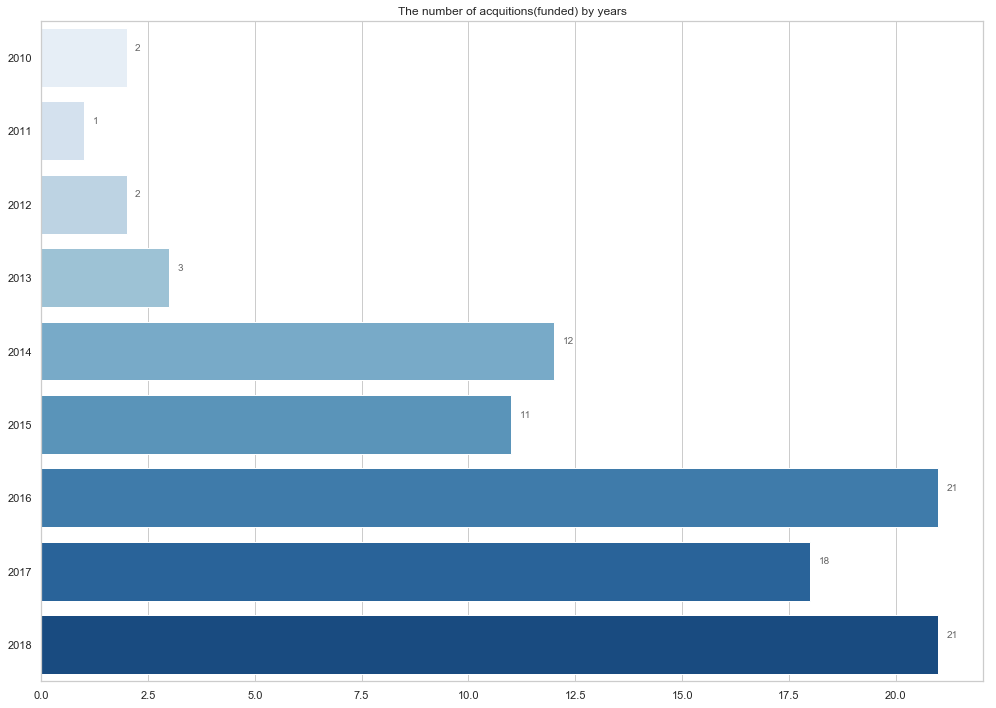

In [45]:
g2_1 = plt.figure(figsize = (14,10))
g2_1 = sns.barplot(x = 'count', y = 'acquired_on_YY', data = grp_time_funded,
                orient = 'h', palette = 'Blues')

# annotations
annotate_h(g2_1)

# figure titles
set_fig_titles(g2_1,"The number of acquitions(funded) by years","","")

In [46]:
grp_region_funded = merged_acq_funded.groupby(['acquiree_country_code']).size().reset_index(name='count')
grp_region_funded = grp_region_funded.sort_values(by='count', ascending = False)
grp_region_funded

,acquiree_country_code,count
4,SGP,49
0,IDN,19
2,MYS,9
5,THA,5
3,PHL,4
6,VNM,4
1,MMR,1


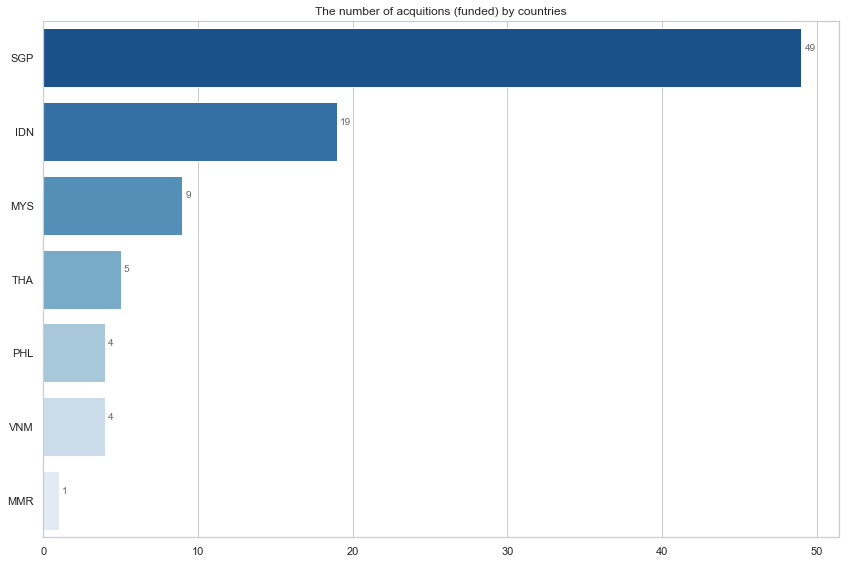

In [47]:
g2_2 = plt.figure()
g2_2 = sns.barplot(x = 'count', y = 'acquiree_country_code', data = grp_region_funded,
                orient = 'h', palette = 'Blues_r')

# annotations
annotate_h(g2_2)

# figure titles
set_fig_titles(g2_2,"The number of acquitions (funded) by countries","","")

In [48]:
grp_region_time_funded = merged_acq_funded.groupby(['acquired_on_YY','acquiree_country_code']).size().reset_index(name='count')
grp_region_time_funded

,acquired_on_YY,acquiree_country_code,count
0,2010,IDN,1
1,2010,SGP,1
2,2011,THA,1
3,2012,SGP,2
4,2013,SGP,3
5,2014,SGP,10
6,2014,THA,1
7,2014,VNM,1
8,2015,MYS,1
9,2015,SGP,7


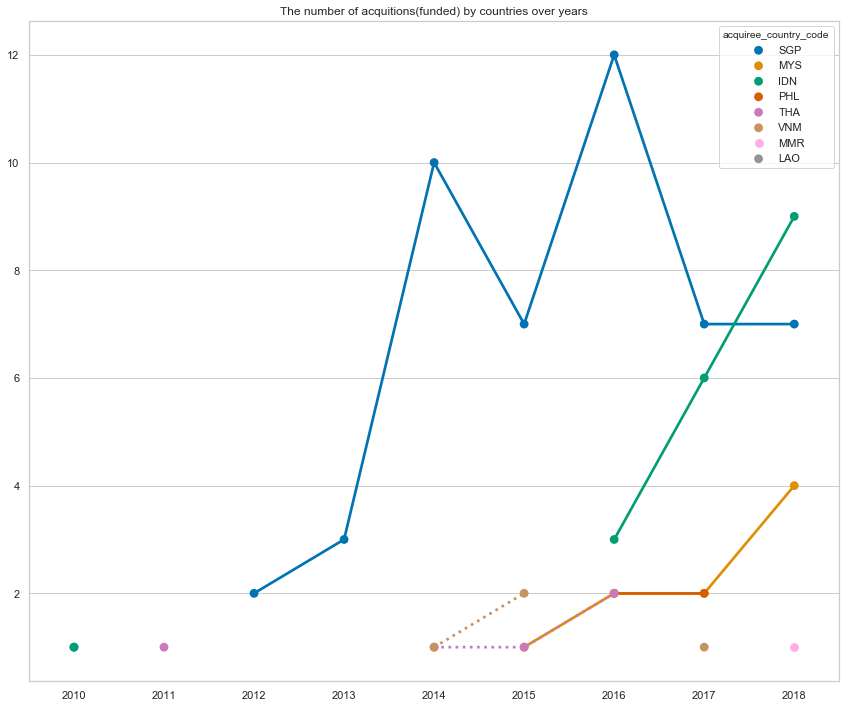

In [49]:
g2_3= plt.figure(figsize=(12,10))
g2_3 = sns.pointplot(x= 'acquired_on_YY',y='count', hue='acquiree_country_code', data = grp_region_time_funded,
                   hue_order = ['SGP','MYS','IDN','PHL','THA','VNM','MMR','LAO'],
                     markers='o', linestyles=['-','-','-','-',':',':',':',':'],
                   palette='colorblind' 
#                    palette='husl' 
                  )

# figure titles
set_fig_titles(g2_3,"The number of acquitions(funded) by countries over years","","")

## 4.2 Acquirers (funded at least once before acquisition) - countries, companies

raw_org was defined and modified in previous sections. 

In [50]:
# raw_org = pd.read_csv('./data/sea_organizations-20181205.csv')
# raw_org.head(2)
 
# COL_org = ['country_code','status','short_description',
#            'category_list','category_group_list','funding_rounds',
#            'funding_total_usd','founded_on','last_funding_on',
#            'employee_count','uuid']

# raw_org = raw_org[COL_org] # select the columns only matter
# # raw_org.drop( xxx,axis=1,inplace=True) # alternative way: drop columns

# raw_org.head()

In [51]:
raw_org.head(1)

,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,acquiree_uuid
0,IDN,operating,Jasa epoxy lantai jakarta,Industrial Manufacturing,Manufacturing,1,NaN,1987-02-02,1987-02-02,11-50,7811358c-0393-4190-b9f4-9dfe5cdce7d1


In [52]:
len(raw_org)

8973

Check out if uuids of acquiree companies are all available in organization table :

In [53]:
merged_acq_funded['acquiree_uuid'].isin(raw_org['acquiree_uuid']).value_counts()

True    91
Name: acquiree_uuid, dtype: int64

In [54]:
len(merged_acq_funded)

91

## 4.2.1 Acquirer countries

In [55]:
grp_aquirer_country_funded = merged_acq_funded.groupby(['acquirer_country_code']).size().reset_index(name='count')
grp_aquirer_country_funded = grp_aquirer_country_funded.sort_values(by='count',ascending=False)
grp_aquirer_country_funded

,acquirer_country_code,count
18,SGP,20
21,USA,17
8,IDN,8
7,GBR,4
1,AUS,4
12,KOR,3
22,VNM,3
4,CHN,3
6,FRA,3
14,MYS,3


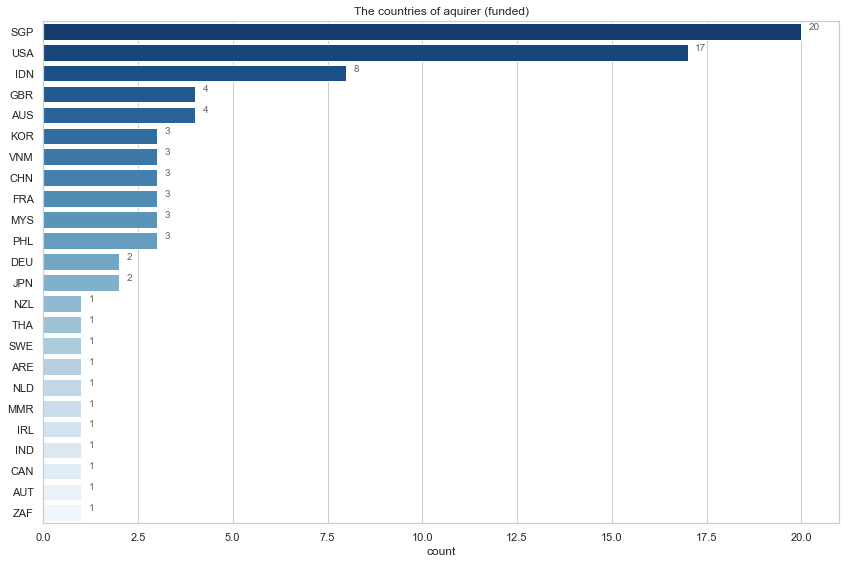

In [56]:
g2_4 = plt.figure()
g2_4 = sns.barplot(x = 'count', y = 'acquirer_country_code', data = grp_aquirer_country_funded,
                orient = 'h', palette = 'Blues_r')

# annotations
annotate_h(g2_4)

# figure titles
set_fig_titles(g2_4,"The countries of aquirer (funded)","count","")

## 4.2.2 Acquirer Companies

In [57]:
acq_name = merged_acq_funded['acquirer_name'].unique()

print ("- unique acquirers: %s companies \n %s " % (len(acq_name),acq_name))

grp_aquirer_name_funded = merged_acq_funded.groupby(['acquirer_name']).size().reset_index(name='count')
grp_aquirer_name_funded.sort_values(by='count',ascending=False)

# grp_aquirer_name_funded = merged_acq_funded.groupby(['acquirer_name','acquiree_name']).size().reset_index(name='count')
# grp_aquirer_name_funded.sort_values(by='count',ascending=False)

- unique acquirers: 82 companies 
 ['Gogoprint Pte Ltd' 'LightInTheBox.com' 'SESAMi' 'Sleekr' 'Bukalapak'
 'Everise' 'MySQUAR' 'Geevv' 'Vostok VR' 'ShopBack' 'MC Payment' 'Razer'
 'Net Reviews' 'KPMG' 'Appota' 'Jollychic'
 'PT. Envy Technologies Indonesia' 'eBay' 'General Technology (GT)' '99.co'
 'Go-Jek' 'Gaztransport & Technigaz' 'Dentsu Aegis Network'
 'Sterling Paper Group of Companies' 'WeWork' 'Sea' 'CreITive' 'Blibli'
 'Invigor Group' 'Air Asia' 'istyle Inc.' 'Jio Technologies Limited'
 'C88 Financial Technologies' 'Grab' 'iFashion Group' 'Carousell'
 'Tencent Holdings' 'Tomizone' 'ayondo' 'Lazada Group' 'ams' 'Xurpas'
 'Reporo' 'iCandy Interactive Limited' 'Pasifis' 'Palantex' 'TribeHired'
 'ExxonMobil' 'CVC Capital Partners' 'POET Technologies' 'migme' 'Kata.ai'
 'Google' 'Grand Perfecta' 'REA Group' 'Linkfluence'
 'Yello Digital Marketing' 'Cloudaron' 'LVMH' 'Applift' 'Weeby.co'
 'Yello Mobile' 'Francisco Partners' 'Foodpanda' 'The Nielsen Company'
 'Altruist Technologies' '

,acquirer_name,count
11,Carousell,3
6,Appota,2
60,Sterling Paper Group of Companies,2
59,Sleekr,2
72,Yello Mobile,2
81,migme,2
24,Go-Jek,2
79,iFashion Group,2
54,Reporo,1
45,MySQUAR,1


## 4.2.3 No. of funding before acquisitions

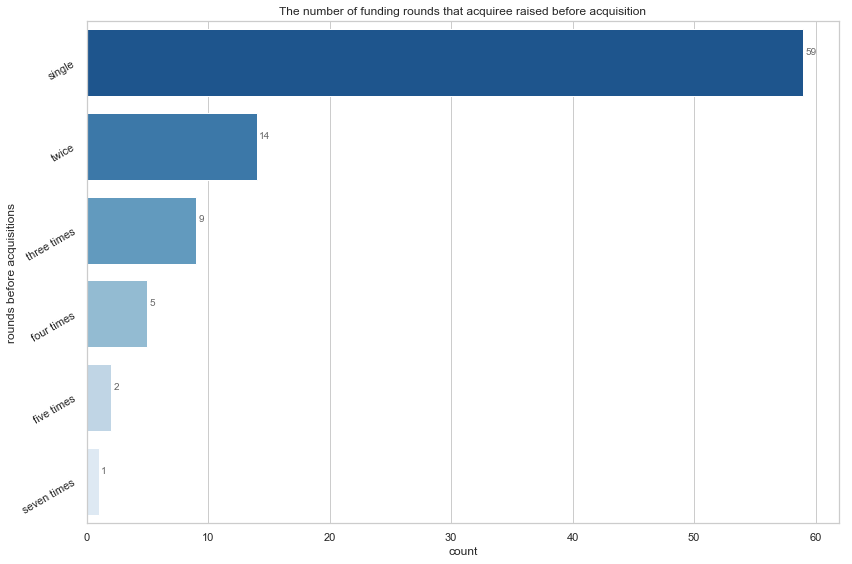

In [58]:
g2_5 = plt.figure()
g2_5 = sns.barplot(x = 'count', y = 'no_of_rounds', data = temp_df[1:7],
                orient = 'h', palette = 'Blues_r')

g2_5.set_yticklabels(["single","twice","three times","four times", "five times", "seven times"],rotation=30)

# annotations
annotate_h(g2_5)

# figure titles
set_fig_titles(g2_5,"The number of funding rounds that acquiree raised before acquisition","count","rounds before acquisitions")


## 4.3 Duration until acquired - year duration, funding stage before acquisition

In [59]:
merged_acq_funded[['founded_on','acquired_on']].head(10)

,founded_on,acquired_on
0,2015-01-01,2018-12-13
1,2010-01-01,2018-11-09
2,2014-01-01,2018-11-07
3,2015-01-01,2018-10-23
4,2015-11-20,2018-10-16
5,2016-04-01,2018-09-24
6,2015-01-01,2018-06-21
7,2016-09-01,2018-06-01
8,2014-11-01,2018-05-09
9,2016-03-13,2018-05-08


In [60]:
merged_acq_funded['Duration_to_exit'] = merged_acq_funded['acquired_on'] - merged_acq_funded['founded_on']
# merged_acq_funded[['Duration_to_exit']]
# merged_acq_funded['Duration_to_exit'].to_clipboard(sep=',')

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
merged_acq_funded.to_clipboard(excel=True,sep='\t')

In [62]:
merged_acq_funded['Duration_to_exit'].describe()

count                           90
mean            2246 days 22:08:00
std      1832 days 17:53:44.024848
min              166 days 00:00:00
25%             1140 days 18:00:00
50%             1583 days 12:00:00
75%             2550 days 12:00:00
max             9681 days 00:00:00
Name: Duration_to_exit, dtype: object

In [63]:
merged_acq_funded['Duration_to_exit'].median()

Timedelta('1583 days 12:00:00')

 
* __the average acquisition time: 6yr-2mon-6day (2246 days)__
* __the median acquisitoins time: 4yr-4mon-3day(1583 days) __

1 missing value is caused by missing value in 'founded_on.' 

## 4.4 Sector Analysis

As the sector categories provided from crunchbase contains multiple sectors for a company, I had to customize the categories for this analysis. Only one representative sector is selected for each company, which is in column `category_list_manual`

In [64]:
category_m = pd.read_csv('./data/sea_acquisition_analysis_20181216-SectorAnalysis_manual.csv')
category_m.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM,country_code,status,short_description,category_list_manual_1,category_list_manual_2_sub,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,Duration_to_exit
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 6:55:16,2018-12-13 6:55:16,2018,2018-12,IDN,acquired,Prinzio is a commercial printing outsourcing,Outsourcing,Outsourcing,"Outsourcing,Printing","Content and Publishing,Media and Entertainment...",1,400000.0,2015-01-01,2015-11-17,1-10,1442 days 00:00:00.000000000


In [65]:
merged_acq_funded.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,Duration_to_exit
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16,2018,2018-12,IDN,acquired,Prinzio is a commercial printing outsourcing,"Outsourcing,Printing","Content and Publishing,Media and Entertainment...",1,400000.0,2015-01-01,2015-11-17,1-10,1442 days


Although both fo the dataframes are identical, will create a column and fill `category_list_manual` in `merged_acq_funded`.

In [66]:
merged_acq_funded['category_list_manual'] = category_m['category_list_manual_1']
merged_acq_funded[['acquiree_name','category_list_manual']].head()

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,acquiree_name,category_list_manual
0,Prinzio,Outsourcing
1,ezbuy,E-Commerce
2,Capital Match,Fintech
3,Jurnal.id,Fintech
4,Prelo,E-Commerce


In [67]:
grp_category = merged_acq_funded.groupby(['category_list_manual']).size().reset_index(name='count')
grp_category = grp_category.sort_values(by='count', ascending = False)
grp_category

,category_list_manual,count
4,E-Commerce,15
0,Advertising/Marketing,11
10,Fintech,8
22,Privacy and Security,8
16,Information Services,6
23,Real Estate,6
25,Travel,3
24,Social Media,3
19,Media and Entertainment,3
11,Gaming,3


Note that as __Fintech__ is comprised of serveral sub-sectors such as payment(4), financial services(2), accounting(1) and consumer lending(1).

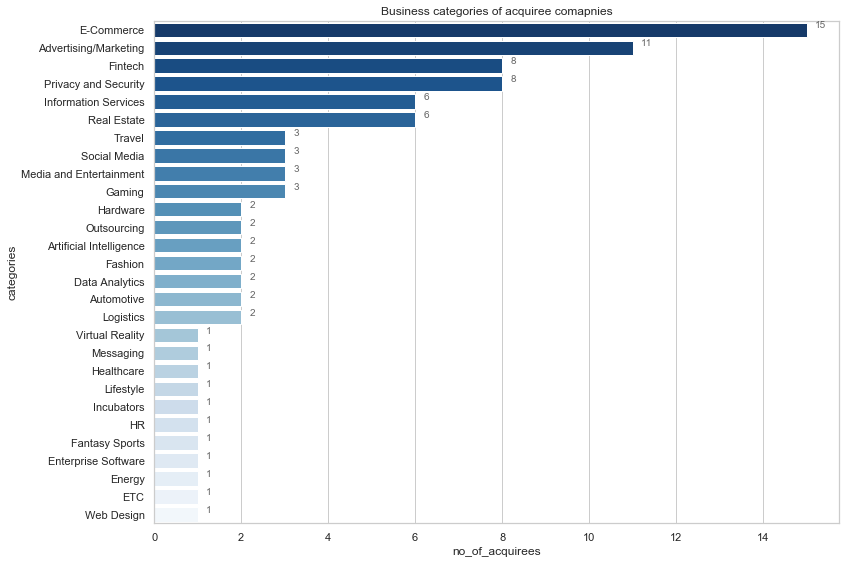

In [68]:
g2_6 = plt.figure()
g2_6 = sns.barplot(x = 'count', y = 'category_list_manual', data = grp_category,
                orient = 'h', palette = 'Blues_r')

# g2_6.set_yticklabels(["single","twice","three times","four times", "five times", "seven times"],rotation=30)

# annotations
annotate_h(g2_6)

# figure titles
set_fig_titles(g2_6,"Business categories of acquiree comapnies","no_of_acquirees","categories")


Todo for blog: elabroate subcategoreis of each categories

## 4.5 Investors, who invested in the acquired comapanies

In [69]:
raw_funding_rounds = pd.read_csv('./data/sea_funding_rounds_2014-20181216.csv')
raw_funding_rounds.head(1)

,company_name,country_code,region,city,investment_type,announced_on,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_currency_code,investor_count,company_uuid,funding_round_uuid,investor_names,investor_uuids
0,Ahometo,VNM,Ho Chi Minh,Ho Chi Minh City,seed,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d991b12f-bd4a-e6eb-b4d4-3365ecf0384e,08d65107-9e21-9a4b-c06f-268236904223,{},{}


For joinning/merging the dataframe, let's make the raw_funding_rounds as simplest. 

In [70]:
raw_funding_rounds = raw_funding_rounds[['company_name','company_uuid','investor_names','investor_uuids']]
raw_funding_rounds.head(2)

,company_name,company_uuid,investor_names,investor_uuids
0,Ahometo,d991b12f-bd4a-e6eb-b4d4-3365ecf0384e,{},{}
1,Healint,2a726f19-bb36-5ca4-6531-b422971e24f5,{},{}


To join the tables with a specific key, rename the `company_uuid` to `acquiree_uuid`

In [71]:
raw_funding_rounds = raw_funding_rounds.rename(columns={'company_uuid': 'acquiree_uuid'})
raw_funding_rounds.head(1)

,company_name,acquiree_uuid,investor_names,investor_uuids
0,Ahometo,d991b12f-bd4a-e6eb-b4d4-3365ecf0384e,{},{}


In [72]:
# left join 
# left dataframe: raw_acq, dataframe to merge: raw_org

merged_acq_investor = pd.merge(merged_acq_funded,
                 raw_funding_rounds,
                 on='acquiree_uuid', 
                 how='left')

# merged_acq.to_csv('./exports/aquisition_merged_w_org_SEA.csv', encoding='utf-8', index=False)

In [73]:
# merged_acq_investor[['acquiree_name','investor_names']].to_csv('./exports/investors_of_acquired_companies.csv',encoding='utf-8', index=False)
merged_acq_investor[['acquiree_name','investor_names']].head(10)

,acquiree_name,investor_names
0,Prinzio,{}
1,ezbuy,{}
2,ezbuy,"{""Vision Knight Capital""}"
3,ezbuy,{}
4,Capital Match,"{""Vitulum Ventures""}"
5,Capital Match,"{""Innosight Ventures""}"
6,Capital Match,"{""B Capital Group""}"
7,Jurnal.id,"{""East Ventures""}"
8,Jurnal.id,"{""Google Launchpad Accelerator""}"
9,Prelo,{}


Note that as it is 'left join' method, multiple rows are created for acquirees. As the analysis only focus on the names/numbers of investors, no additional data preprocess is needed. 

In [74]:
merged_acq_investor['investor_names'].unique().tolist()
# merged_acq_investor['investor_names'].value_counts()

['{}',
 '{"Vision Knight Capital"}',
 '{"Vitulum Ventures"}',
 '{"Innosight Ventures"}',
 '{"B Capital Group"}',
 '{"East Ventures"}',
 '{"Google Launchpad Accelerator"}',
 '{"Fenox Venture Capital"}',
 '{"East Ventures","Skystar Capital"}',
 '{Razer}',
 '{"TEV | Tengelmann Ventures"}',
 nan,
 '{"Golden Gate Ventures"}',
 '{"HV Holtzbrinck Ventures"}',
 '{"General Technology (GT)"}',
 '{"Singapore Press Holdings"}',
 '{"Omidyar Network"}',
 '{"East Ventures","Sovereign’s Capital"}',
 '{"Vertex Ventures"}',
 '{Sea}',
 '{"Tiger Global Management"}',
 '{"Gobi Partners"}',
 '{"East Ventures","GREE Ventures"}',
 '{"Emtek Group"}',
 '{"econtext Asia and Beenos Asia"}',
 '{"Cerebro Labs"}',
 '{"Eduardo Saverin","Jani Rautiainen","Meng Weng Wong","Steve Melhuish"}',
 '{"Global Mobile Game Confederation"}',
 '{"500 Startups"}',
 '{"Fatfish Internet Group"}',
 '{"Baird Capital"}',
 '{"GREE Ventures"}',
 '{"REA Group"}',
 '{TransCosmos}',
 '{"YG Entertainment"}',
 '{Weipinhui}',
 '{"Ward Ferry Ma

In [75]:
# merged_acq_investor['investor_names'].dtype

In [76]:
# merged_acq_investor['investor_names'].to_json()

In [77]:
# merged_acq_investor['investor_names'] = merged_acq_investor['investor_names'].astype('str')
# merged_acq_investor['investor_names'] = merged_acq_investor['investor_names'].str.split(',') 
# merged_acq_investor['investor_names'].dtype

__ Note that the investor data in crunchbase has a notable missing points __
__ e.g. https://wavemaker.vc/sea/wavemakers/ __

_(disclaimer) Note that again this research covers ONLY acquisitions based in SE Asia, ONLY M&As. As this result is mostly dependent on the raw data from CrunchBase, some manual input was made, but there can be some missing points. Thus, this result shouldn't be used for ranking investment firms and the number doesn't represent the overall performance of the investment firms. The firms have more exit cases through IPOs or through acquisitions outside SE Asia._


__Invested in at least 5 companies who got acuired:__
* Wavemaker: 5 (Art of Click, Gushcloud, Pie.co, Luxola, Caarly )

__Invested in at least 4 companies who got acquired:__
* East Ventures: 4 (Jurnal.id, Talenta, LOKET, Kudo)

__Invested in at least 2 companies who got acquired:__
* Golden Gate Ventures: 3 (Redmart, Noonswon, Wifi Chua)
* SEA(former Garena): 2 (FOODY, RedMart)
* Google Launchpad Accelerator: 2 (Talenta, Jurnal.id)

__Invested at least 1 company who got acquired. __

* Gobi Partners
* Vertex Ventures
* Fenox Venture Capital
* 500 Startups
* Access Ventures

* TransCosmos
* Razer
* Vipshop
* GREE Ventures
* Skystar Capital
* Sovereign’s Capital
* econtext Asia and Beenos Asia
* Global Mobile Game Confederation
* General Technology (GT)
* Omidyar Network
* Cerebro Labs
* Tiger Global Management
* Singapore Press Holdings
* Innosight Ventures
* Emtek Group
* Vision Knight Capital
* B Capital Group
* Ward Ferry Management
* Fatfish Internet Group
* Vitulum Ventures
* GREE Ventures
* Eduardo Saverin
* Jani Rautiainen
* Meng Weng Wong
* Steve Melhuish
* Baird Capital
* REA Group
* YG Entertainment
* HV Holtzbrinck Ventures
* TEV | Tengelmann Ventures

## 4.6 Company size

In [78]:
merged_acq_funded.head(1)

,acquiree_name,acquiree_country_code,acquiree_region,acquiree_city,acquirer_name,acquirer_country_code,acquirer_region,acquisition_type,acquired_on,price_usd,price,price_currency_code,acquiree_uuid,acquirer_uuid,acquisition_uuid,created_at,updated_at,acquired_on_YY,acquired_on_YYMM,country_code,status,short_description,category_list,category_group_list,funding_rounds,funding_total_usd,founded_on,last_funding_on,employee_count,Duration_to_exit,category_list_manual
0,Prinzio,IDN,IDN - Other,Kuningan,Gogoprint Pte Ltd,SGP,Singapore,acquisition,2018-12-13,NaN,NaN,NaN,c28cc7fe-dde5-3d13-3b04-4303855c0c77,41890187-2e4f-e0b1-c64a-0ecfc91829fa,19b96b91-c25c-4619-9889-f72fd6b17ff2,2018-12-13 06:55:16,2018-12-13 06:55:16,2018,2018-12,IDN,acquired,Prinzio is a commercial printing outsourcing,"Outsourcing,Printing","Content and Publishing,Media and Entertainment...",1,400000.0,2015-01-01,2015-11-17,1-10,1442 days,Outsourcing


In [79]:
grp_employee = merged_acq_funded.groupby(['employee_count']).size().reset_index(name='count')
grp_employee = grp_employee.sort_values(by = 'count',ascending = False)
grp_employee

,employee_count,count
4,11-50,32
0,1-10,19
7,51-100,13
8,unknown,9
6,501-1000,7
3,101-250,5
5,251-500,3
2,1001-5000,2
1,10000+,1


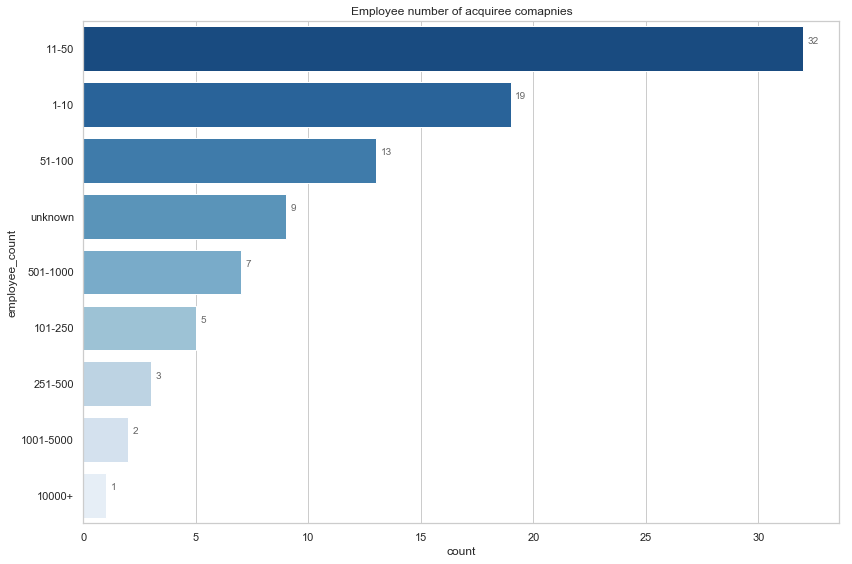

In [80]:
g2_7 = plt.figure()
g2_7 = sns.barplot(x = 'count', y = 'employee_count', data = grp_employee,
                orient = 'h', palette = 'Blues_r')

# g2_6.set_yticklabels(["single","twice","three times","four times", "five times", "seven times"],rotation=30)

# annotations
annotate_h(g2_7)

# figure titles
set_fig_titles(g2_7,"Employee number of acquiree comapnies","count","employee_count")


To-do (TBD): 
- get the values from the bracket in the row/json. maybe type has to be transformed to 'str'
- count

In [81]:
# import re
# merged_acq_investor.apply(lambda x: re.sub(r'\{.*\}', '', x))

TODO:
 - Number of co-founders?
 - exit companies/ total companies born

### References:

In [82]:
""" Tips:  Groupby operations examples: """
# raw_funding['investment_type'].groupby(raw_funding['announced_on_Y']).describe()
# raw_funding['announced_on_Y'].groupby(raw_funding['investment_type']).describe()
# raw_funding.groupby(['announced_on_Y', 'investment_type']).count()
# grp_time = raw_acq.groupby(['acquired_on_YY']).size().reset_index(name='count')

# raw_funding['raised_amount_usd'].groupby(raw_funding['announced_on_Y'], raw_funding['investment_type'])
# raw_funding['raised_amount_usd'].groupby(raw_funding['investment_type']).describe()
# raw_funding['raised_amount_usd'].groupby(raw_funding['announced_on_Y']).mean()

' Tips:  Groupby operations examples: '